1. Importing the required Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier


2. Reading the file to build the model|

In [12]:
df=pd.read_csv("C:/Users/HP/Desktop/Giriraj_DA/Project 2/Telecom-Churn_Analysis/telecom_churn_for_model.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Churn                                    7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   Partner_No                               7032 non-null   int64  
 7   Partner_Yes                              7032 non-null   int64  
 8   Dependents_No                            7032 non-null   int64  
 9   Dependents_Yes                           7032 non-null   int64  
 10  PhoneService_No                          7032 no

#Removing 0th Column

In [13]:
df=df.drop('Unnamed: 51',axis=1)

In [54]:
df.columns

Index(['SeniorCitizen', 'Churn', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [14]:
df.head(2)

,SeniorCitizen,Churn,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_0–12,tenure_bin_13–24,tenure_bin_25–36,tenure_bin_37–48,tenure_bin_49–60,tenure_bin_61–72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0


3. Splitting the dependent and independent features

In [18]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

4. Splitting the train and test dataset

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Training the model with Decision Tree Classifier

5. Inititalizing/ Building the model

In [16]:
# Initialize the model
model = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=6,            # Limit tree depth to avoid overfitting
    random_state=100
)

6. Training the model with training data

In [21]:
# Train the model on training data
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=100)

7. Predicting the Test 

In [22]:
y_pred=model.predict(x_test)

8. Checking the accuracy, confusion matrix, classification Report

In [23]:

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred,labels=[0,1]))

✅ Accuracy: 0.8365316275764036

📉 Confusion Matrix:
 [[1155   37]
 [ 193   22]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1192
           1       0.37      0.10      0.16       215

    accuracy                           0.84      1407
   macro avg       0.61      0.54      0.54      1407
weighted avg       0.78      0.84      0.80      1407



# Our data set is inbalanced as there is 73% unchurned data. 
  We have to make the data equal/balance.

  We are using SMOTE ENN technique to create synthetic data & loading the clean data. 

In [24]:
smote_enn = SMOTEENN(random_state=100)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

c:\Users\HP\Desktop\Giriraj_DA\Project 2\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\HP\Desktop\Giriraj_DA\Project 2\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\HP\Desktop\Giriraj_DA\Project 2\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


10. Splitting the balanced data into training and test data. Test data= 20%, Training data=80% 

In [25]:
X_df_train, X_df_test, Y_df_train, Y_df_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=100)

11. Again building the model with decision tree classifier

In [26]:
model_dt_smote=DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=6,            # Limit tree depth to avoid overfitting
    random_state=100
)

12. Fitting/Training the model

In [27]:
model_dt_smote.fit(X_df_train,Y_df_train)

DecisionTreeClassifier(max_depth=6, random_state=100)

13. Predicting the Test dat

In [28]:
y_df_pred=model_dt_smote.predict(X_df_test)

14. Checking the model Accuracy

In [29]:
print("✅ Accuracy:", accuracy_score(Y_df_test,y_df_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(Y_df_test, y_df_pred))
print("\n📋 Classification Report:\n", classification_report(Y_df_test, y_df_pred))

✅ Accuracy: 0.8549051937345424

📉 Confusion Matrix:
 [[453  87]
 [ 89 584]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       540
           1       0.87      0.87      0.87       673

    accuracy                           0.85      1213
   macro avg       0.85      0.85      0.85      1213
weighted avg       0.85      0.85      0.85      1213



# Training the model with Random Forest Classifier:-

In [30]:
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=100)

In [31]:
rf_smote_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=10,         # limit depth to avoid overfitting
    random_state=42,
    class_weight='balanced'  # handle imbalance
)

In [32]:
rf_smote_model.fit(X_rf_train, Y_rf_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [33]:
y_rf_pred_smote=model_dt_smote.predict(X_rf_test)

In [34]:
print("✅ Accuracy:", accuracy_score(Y_rf_test, y_rf_pred_smote))
print("\n📉 Confusion Matrix:\n", confusion_matrix(Y_rf_test, y_rf_pred_smote))
print("\n📋 Classification Report:\n", classification_report(Y_rf_test, y_rf_pred_smote))

✅ Accuracy: 0.8549051937345424

📉 Confusion Matrix:
 [[453  87]
 [ 89 584]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       540
           1       0.87      0.87      0.87       673

    accuracy                           0.85      1213
   macro avg       0.85      0.85      0.85      1213
weighted avg       0.85      0.85      0.85      1213



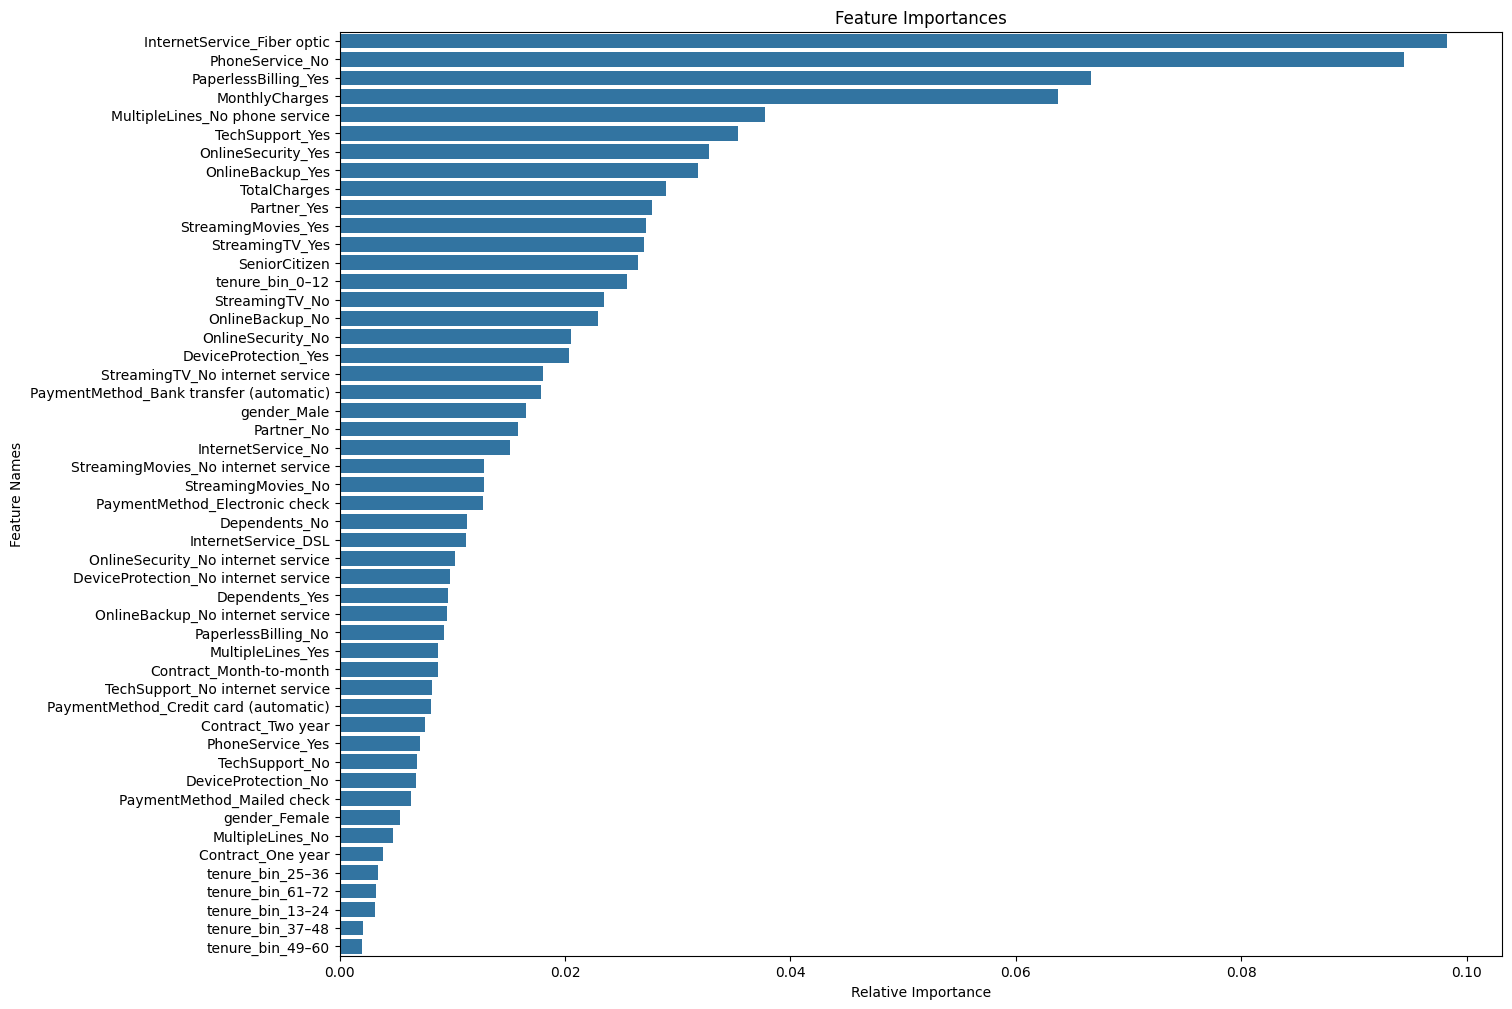

In [45]:

# Feature Selection using Feature Importance
importances = rf_smote_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 12))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Both the models are performing the same we can Check the result with other classifiers

In [67]:
df2=pd.read_csv("C:/Users/HP/Desktop/Giriraj_DA/Project 2/Telecom-Churn_Analysis/dummy_telecom_data_1000_with_tenure.csv")
df2.head(2)



,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure
0,0001-VHVEG,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),57.45,1747.68,1,45
1,0002-VHVEG,Male,1,No,No,Yes,No,No,No,No internet service,...,No internet service,No,No,One year,Yes,Credit card (automatic),115.07,4922.92,0,2


In [ ]:
# Define bins (edges) and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']

# Create the tenure_bin column
df2['tenure_bin'] = pd.cut(df2['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
df2['tenure_bin'].value_counts()

df2.drop(columns='tenure', inplace=True)


In [74]:
df2['tenure_bin'] = df2['tenure_bin'].astype('object')

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   PhoneService      1000 non-null   object 
 6   MultipleLines     1000 non-null   object 
 7   InternetService   1000 non-null   object 
 8   OnlineSecurity    1000 non-null   object 
 9   OnlineBackup      1000 non-null   object 
 10  DeviceProtection  1000 non-null   object 
 11  TechSupport       1000 non-null   object 
 12  StreamingTV       1000 non-null   object 
 13  StreamingMovies   1000 non-null   object 
 14  Contract          1000 non-null   object 
 15  PaperlessBilling  1000 non-null   object 
 16  PaymentMethod     1000 non-null   object 
 

In [76]:
original_data=df2.copy()

In [77]:
customerID=df2['customerID']

In [78]:
new_df=df2.drop(['customerID','Churn'],axis=1)

In [79]:
new_df_dummies=pd.get_dummies(new_df)
bool_cols =new_df_dummies.select_dtypes(include='bool').columns
new_df_dummies[bool_cols]=new_df_dummies[bool_cols].astype(int)
new_df_dummies.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_0–12,tenure_bin_13–24,tenure_bin_25–36,tenure_bin_37–48,tenure_bin_49–60,tenure_bin_61–72
0,0,57.45,1747.68,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,115.07,4922.92,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [80]:
new_df_dummies.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessB

In [82]:
new_predictions=model_dt_smote.predict(new_df_dummies)

In [83]:
original_data['Customer_Status_Predicted']=new_predictions

In [84]:
original_data.to_csv("Predicted_Churn_Final.csv")